In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import pandas as pd
from scipy.stats import linregress

# PLOT

In [3]:
# Load the CSV file
file_path = 'Resources/average_air_quality_health.csv'
data = pd.read_csv(file_path)

# Drop the 'City' column
data = data.drop(columns=['City'])

# Group by 'Country' and calculate the mean for all numeric columns
country_aggregated = data.groupby('Country').sum().reset_index()

# Round all numeric columns to 0 decimal places
country_aggregated = country_aggregated.round(0)

# Display the result
country_aggregated.head()

df_ranked = country_aggregated.sort_values(by='MortalityRate_per_100k', ascending=False)
top_10_country_ranking = df_ranked.head(10)

In [4]:
df_ranked

,Country,PM2.5,PM10,NO2,O3,SO2,CO,NH3,MortalityRate_per_100k
63,RU,133.0,185.0,100.0,2707.0,43.0,13047.0,11.0,940.0
11,CN,585.0,964.0,210.0,1102.0,150.0,7220.0,21.0,426.0
31,IN,304.0,377.0,69.0,418.0,47.0,4369.0,28.0,272.0
77,US,166.0,270.0,210.0,2567.0,44.0,9446.0,31.0,228.0
29,ID,61.0,72.0,9.0,444.0,10.0,3737.0,6.0,224.0
...,...,...,...,...,...,...,...,...,...
14,DE,19.0,22.0,14.0,0.0,4.0,364.0,2.0,7.0
78,UY,2.0,3.0,2.0,19.0,0.0,240.0,3.0,6.0
30,IE,2.0,3.0,0.0,86.0,0.0,205.0,0.0,6.0
3,BE,2.0,2.0,8.0,51.0,1.0,217.0,3.0,6.0


## Country combined vs Mortality Rate

### Mortality rate vs Country by all

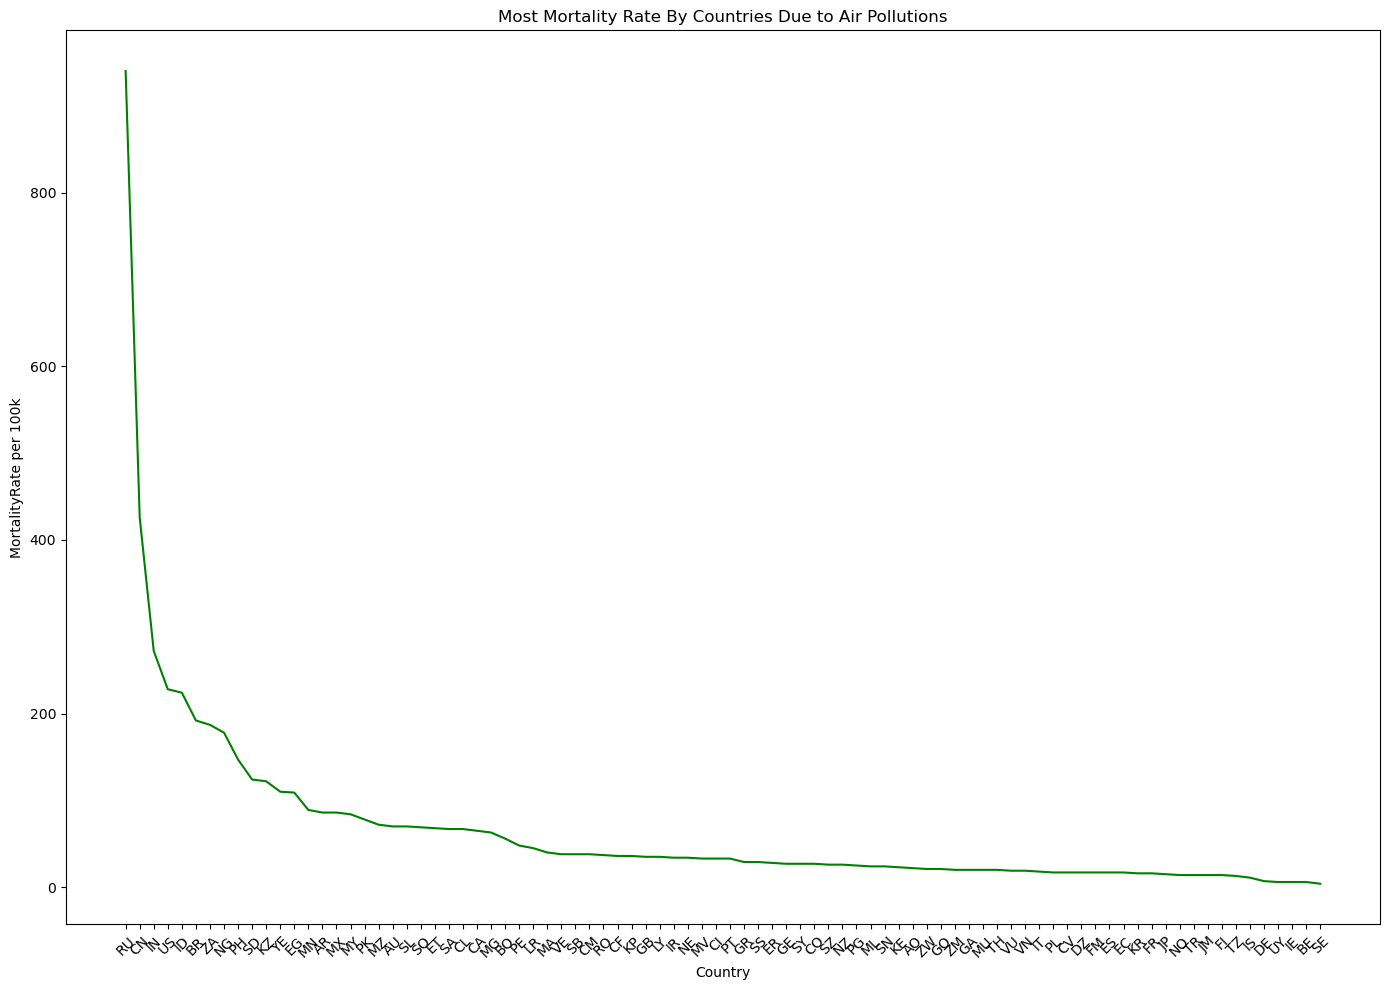

In [76]:
x_axis = df_ranked['Country']
y_axis = df_ranked['MortalityRate_per_100k']
plt.figure(figsize=(14,10))
plt.plot(x_axis,y_axis, color='green')
plt.xticks(rotation=45) 
plt.xlabel("Country")
plt.title("Most Mortality Rate By Countries Due to Air Pollutions")
plt.ylabel("MortalityRate per 100k")
plt.tight_layout()
plt.savefig('Picture_for_Presentation/Mortality_Rate_By_Countries_Due_to_air_pollution.png')
plt.show() 

### top 10

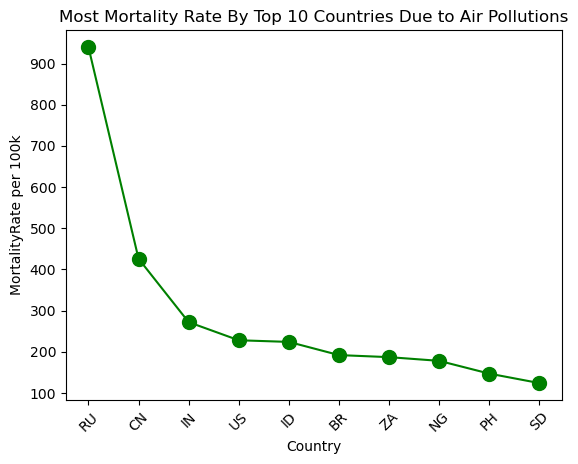

In [42]:
x_axis = top_10_country_ranking['Country']
y_axis = top_10_country_ranking['MortalityRate_per_100k']
plt.plot(x_axis,y_axis, color='green', marker="o", markersize=10)
plt.xticks(rotation=45) 
plt.xlabel("Country")
plt.title("Most Mortality Rate By Top 10 Countries Due to Air Pollutions")
plt.ylabel("MortalityRate per 100k")
plt.savefig('Picture_for_Presentation/Most_Mortality_Rate_By_Top_10_Countries_Due_to_air_pollution.png')
plt.show() 

### top 10 vs bot 10

In [5]:
top_10 = df_ranked.head(10)
bot_8 = df_ranked.tail(8)
combined_df = pd.concat([top_10, bot_8])


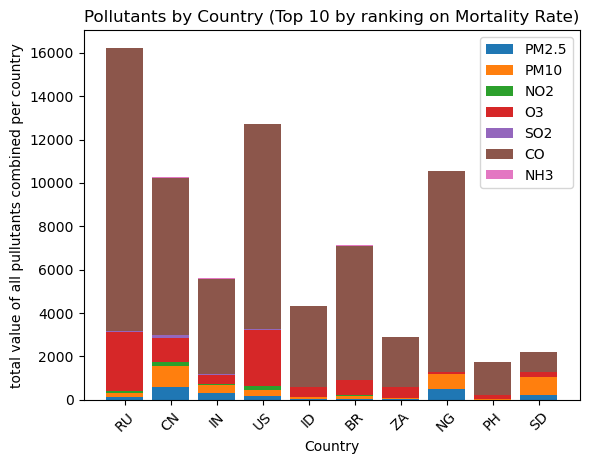

In [7]:
#comparing Top 10 most mortality rate country to 
plt.bar(top_10['Country'], top_10['PM2.5'], label='PM2.5')
plt.bar(top_10['Country'], top_10['PM10'], bottom=top_10['PM2.5'], label='PM10')
plt.bar(top_10['Country'], top_10['NO2'], bottom=top_10['PM2.5'] + top_10['PM10'], label='NO2')
plt.bar(top_10['Country'], top_10['O3'], bottom=top_10['PM2.5'] + top_10['PM10'] + top_10['NO2'], label='O3')
plt.bar(top_10['Country'], top_10['SO2'], bottom=top_10['PM2.5'] + top_10['PM10'] + top_10['NO2'] + top_10['O3'], label='SO2')
plt.bar(top_10['Country'], top_10['CO'], bottom=top_10['PM2.5'] + top_10['PM10'] + top_10['NO2'] + top_10['O3'] + top_10['SO2'], label='CO')
plt.bar(top_10['Country'], top_10['NH3'], bottom=top_10['PM2.5'] + top_10['PM10'] + top_10['NO2'] + top_10['O3'] + top_10['SO2']  + top_10['CO'], label='NH3')

#labels
plt.xlabel('Country')
plt.ylabel('total value of all pullutants combined per country')
plt.title('Pollutants by Country (Top 10 by ranking on Mortality Rate)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

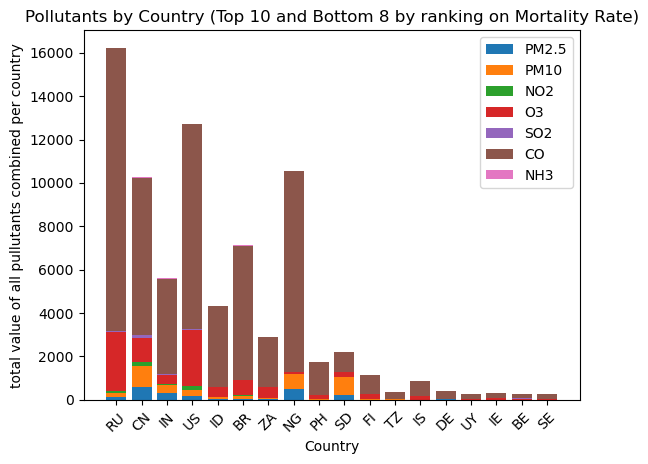

In [79]:
#comparing Top 10 most mortality rate country to 
plt.bar(combined_df['Country'], combined_df['PM2.5'], label='PM2.5')
plt.bar(combined_df['Country'], combined_df['PM10'], bottom=combined_df['PM2.5'], label='PM10')
plt.bar(combined_df['Country'], combined_df['NO2'], bottom=combined_df['PM2.5'] + combined_df['PM10'], label='NO2')
plt.bar(combined_df['Country'], combined_df['O3'], bottom=combined_df['PM2.5'] + combined_df['PM10'] + combined_df['NO2'], label='O3')
plt.bar(combined_df['Country'], combined_df['SO2'], bottom=combined_df['PM2.5'] + combined_df['PM10'] + combined_df['NO2'] + combined_df['O3'], label='SO2')
plt.bar(combined_df['Country'], combined_df['CO'], bottom=combined_df['PM2.5'] + combined_df['PM10'] + combined_df['NO2'] + combined_df['O3'] + combined_df['SO2'], label='CO')
plt.bar(combined_df['Country'], combined_df['NH3'], bottom=combined_df['PM2.5'] + combined_df['PM10'] + combined_df['NO2'] + combined_df['O3'] + combined_df['SO2']  + combined_df['CO'], label='NH3')

#labels
plt.xlabel('Country')
plt.ylabel('total value of all pullutants combined per country')
plt.title('Pollutants by Country (Top 10 and Bottom 8 by ranking on Mortality Rate)')
plt.xticks(rotation=45)
plt.legend()
plt.savefig('Picture_for_Presentation/Top_10_VS_Bot_8.png')
plt.show()

### pollutant levels by countries

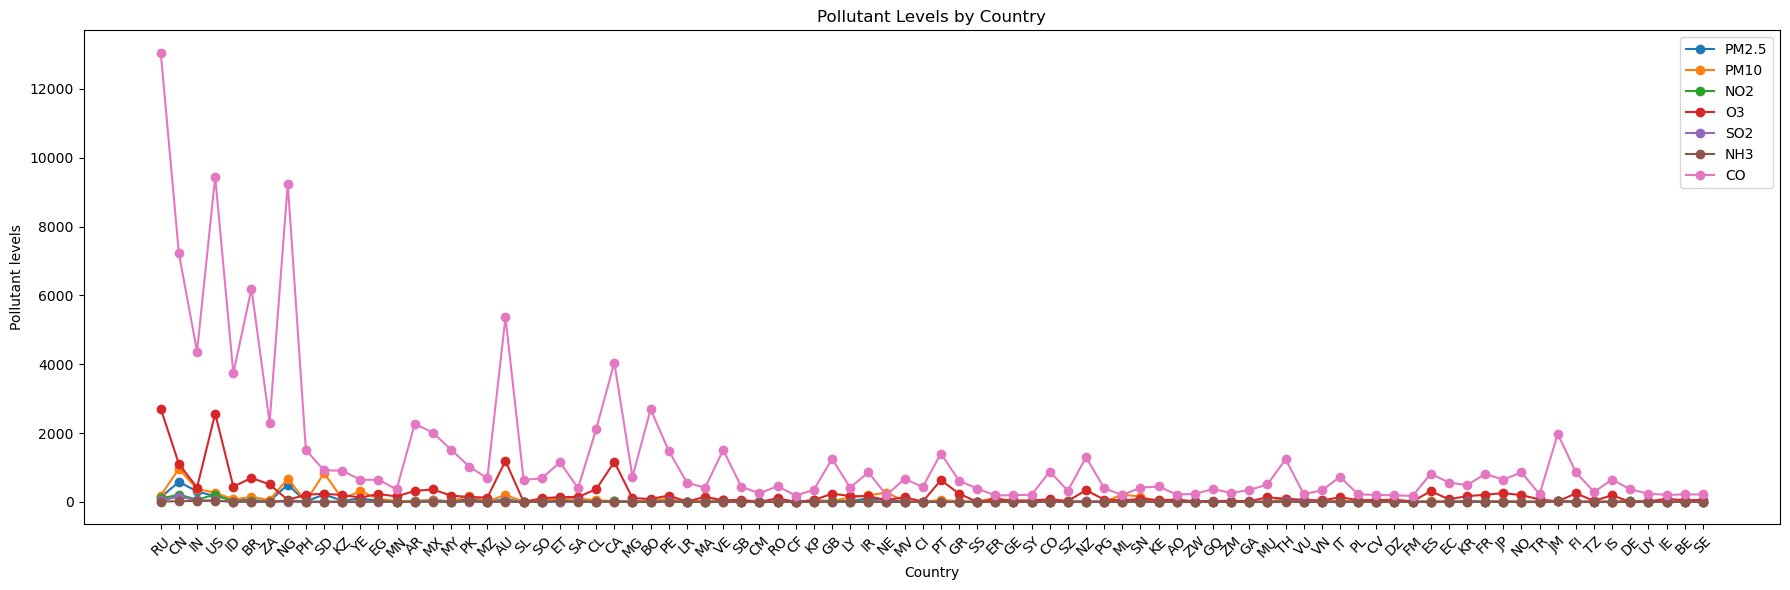

In [54]:
# Different pollutant levels spread through Countries

plt.figure(figsize=(18, 6)) 

plt.plot(df_ranked['Country'], df_ranked['PM2.5'], label='PM2.5', marker='o')
plt.plot(df_ranked['Country'], df_ranked['PM10'], label='PM10', marker='o')
plt.plot(df_ranked['Country'], df_ranked['NO2'], label='NO2', marker='o')
plt.plot(df_ranked['Country'], df_ranked['O3'], label='O3', marker='o')
plt.plot(df_ranked['Country'], df_ranked['SO2'], label='SO2', marker='o')
plt.plot(df_ranked['Country'], df_ranked['NH3'], label='NH3', marker='o')
plt.plot(df_ranked['Country'], df_ranked['CO'], label='CO', marker='o')


plt.xlabel('Country')
plt.ylabel('Pollutant levels')
plt.title('Pollutant Levels by Country')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('Picture_for_Presentation/Pollutant_levels_by_country.png')
plt.show()

In [46]:
# try to get the table with Country and MortalityRate only for Powerpoint
top_10_10_countrywithMortality =  top_10_country_ranking.drop(columns=['PM2.5','PM10','NO2','O3','SO2',
                                                          'CO','NH3'])
top_10_10_countrywithMortality

,Country,MortalityRate_per_100k
63,RU,940.0
11,CN,426.0
31,IN,272.0
77,US,228.0
29,ID,224.0
5,BR,192.0
83,ZA,187.0
53,NG,178.0
58,PH,147.0
66,SD,124.0


## PM10 vs PM2.5 according to Linear Regression

In [9]:
df_filtered_pm10_pm25 = df_ranked[['Country', 'PM2.5', 'PM10', 'MortalityRate_per_100k']]

df_filtered_pm10_pm25 = df_filtered_pm10_pm25.head(10)

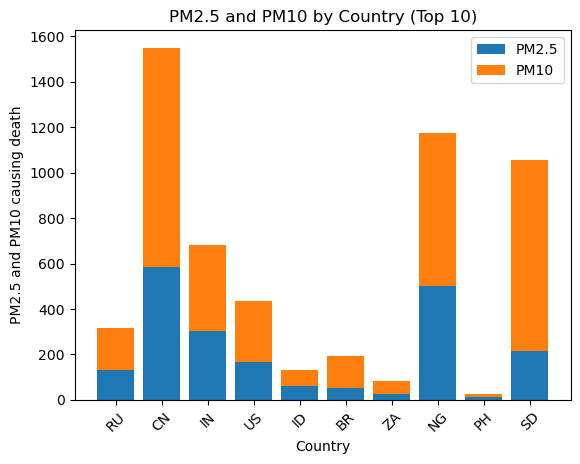

In [10]:
#cuz from linear regression, we can tell PM10 and PM2.5 sharing a larger value then the rest
#even 
plt.bar(df_filtered_pm10_pm25['Country'], df_filtered_pm10_pm25['PM2.5'], label='PM2.5')
plt.bar(df_filtered_pm10_pm25['Country'], df_filtered_pm10_pm25['PM10'], bottom=df_filtered_pm10_pm25['PM2.5'], label='PM10')

#labels
plt.xlabel('Country')
plt.ylabel('PM2.5 and PM10 causing death')
plt.title('PM2.5 and PM10 by Country (Top 10)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# DATA exploration

In [12]:
# Load the CSV file
file_path = 'Resources/average_air_quality_health.csv'
data = pd.read_csv(file_path)

## PM2.5

Equation of line: y = 0.15x + 13.05
The r-squared is: 0.1210517461434011


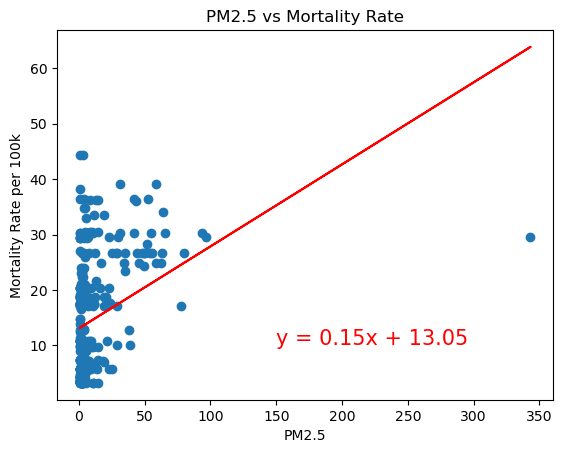

In [57]:
# Scatter plot between PM2.5 and Mortality Rate
x_axis_data_PM25 = data['PM2.5']
y_axis_data = data['MortalityRate_per_100k']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_data_PM25, y_axis_data)
regress_values = x_axis_data_PM25 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis_data_PM25, y_axis_data)
plt.title('PM2.5 vs Mortality Rate')
plt.xlabel('PM2.5')
plt.ylabel('Mortality Rate per 100k')
plt.plot(x_axis_data_PM25,regress_values,"r-")
plt.annotate(line_eq,(150,10),fontsize=15,color="red") 
print(f"Equation of line: y = {slope:.2f}x + {intercept:.2f}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Picture_for_Presentation/PM2.5_vs_MortalityRate.png')
plt.show()

In [14]:
##conclusion
# The R-squared value of 0.121 means that only 12.1% of the variation in mortality rate can be explained by PM2.5 levels. 
# This indicates a weak linear relationship between PM2.5 levels and mortality rates, 
# with most of the variation (87.9%) likely due to other factors not captured by this model.

## PM10

The r-squared is: 0.14026473720940433


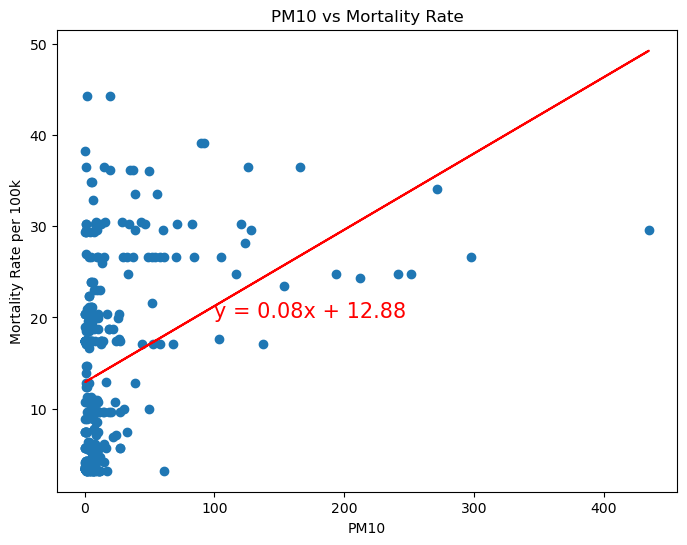

In [59]:
# Scatter plot between PM2.5 and Mortality Rate
x_axis_data_PM10 = data['PM10']
y_axis_data = data['MortalityRate_per_100k']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_data_PM10, y_axis_data)
regress_values = x_axis_data_PM10 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8, 6)) 
plt.scatter(x_axis_data_PM10, y_axis_data)
plt.title('PM10 vs Mortality Rate')
plt.xlabel('PM10')
plt.ylabel('Mortality Rate per 100k')
plt.plot(x_axis_data_PM10, regress_values,"r-")
plt.annotate(line_eq,(100,20),fontsize=15,color="red") 
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Picture_for_Presentation/PM10_vs_MortalityRate.png')
plt.show()

In [16]:
##conclusion:
# The R-squared value of 0.140 indicates that about 14.0% of the variation 
# in mortality rates can be explained by PM10 levels.
# This suggests a weak linear relationship, with most of the variation (86.0%) likely influenced by 
# other factors not accounted for in the model.

## NO2

The r-squared is: 0.008193559037854539


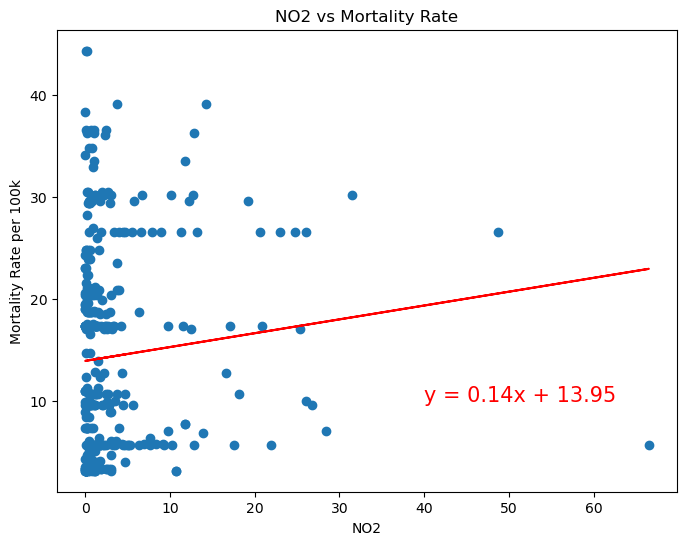

In [60]:
# Scatter plot between PM2.5 and Mortality Rate
x_axis_data_NO2 = data['NO2']
y_axis_data = data['MortalityRate_per_100k']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_data_NO2, y_axis_data)
regress_values = x_axis_data_NO2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8, 6)) 
plt.scatter(x_axis_data_NO2, y_axis_data)
plt.title('NO2 vs Mortality Rate')
plt.xlabel('NO2')
plt.ylabel('Mortality Rate per 100k')
plt.plot(x_axis_data_NO2, regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red") 
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Picture_for_Presentation/NO2_vs_MortalityRate.png')
plt.show()

## CO

The r-squared is: 0.040201186162711816


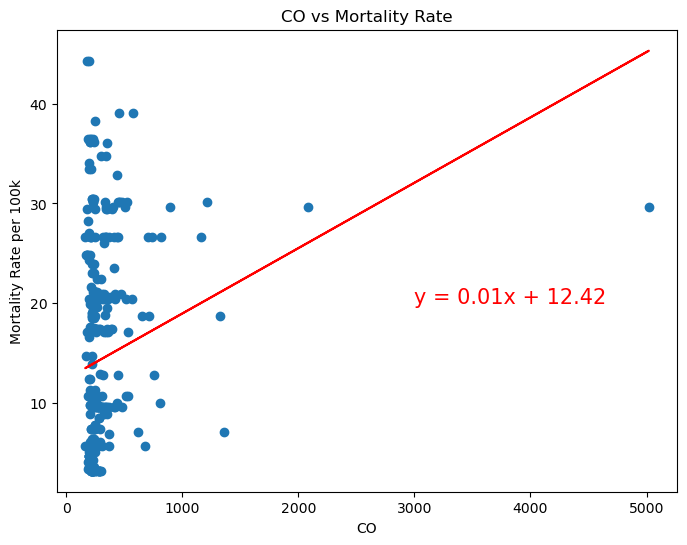

In [61]:
# Scatter plot between PM2.5 and Mortality Rate
x_axis_data_CO = data['CO']
y_axis_data = data['MortalityRate_per_100k']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_data_CO, y_axis_data)
regress_values = x_axis_data_CO * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8, 6)) 
plt.scatter(x_axis_data_CO, y_axis_data)
plt.title('CO vs Mortality Rate')
plt.xlabel('CO')
plt.ylabel('Mortality Rate per 100k')
plt.plot(x_axis_data_CO, regress_values,"r-")
plt.annotate(line_eq,(3000,20),fontsize=15,color="red") 
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Picture_for_Presentation/CO_vs_MortalityRate.png')
plt.show()

## O3

The r-squared is: 0.02299068041054326


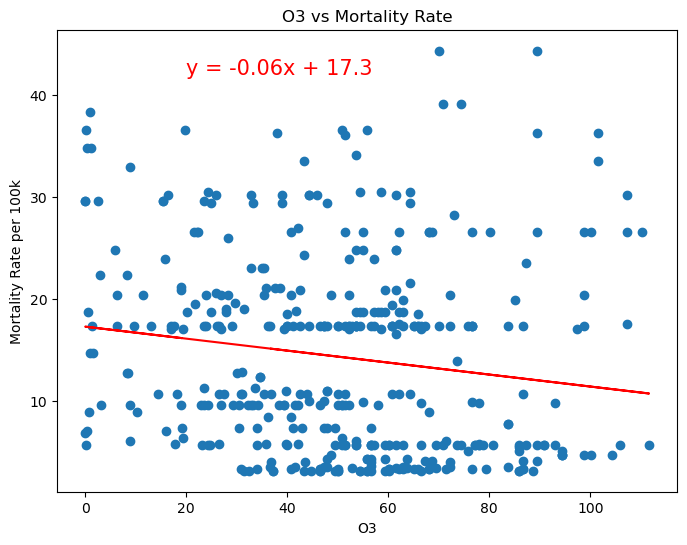

In [62]:
# Scatter plot between PM2.5 and Mortality Rate
x_axis_data_O3 = data['O3']
y_axis_data = data['MortalityRate_per_100k']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_data_O3, y_axis_data)
regress_values = x_axis_data_O3 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8, 6)) 
plt.scatter(x_axis_data_O3, y_axis_data)
plt.title('O3 vs Mortality Rate')
plt.xlabel('O3')
plt.ylabel('Mortality Rate per 100k')
plt.plot(x_axis_data_O3, regress_values,"r-")
plt.annotate(line_eq,(20,42),fontsize=15,color="red") 
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Picture_for_Presentation/O3_vs_MortalityRate.png')
plt.show()

## SO2

The r-squared is: 0.033293329745142354


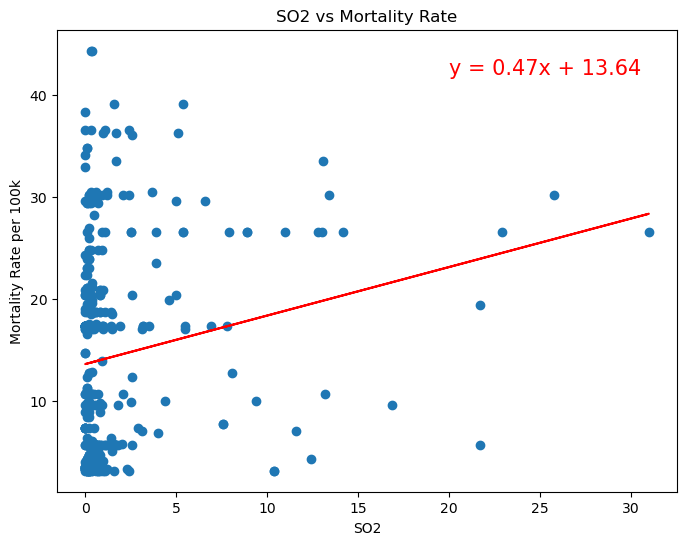

In [64]:
# Scatter plot between PM2.5 and Mortality Rate
x_axis_data_SO2 = data['SO2']
y_axis_data = data['MortalityRate_per_100k']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_data_SO2, y_axis_data)
regress_values = x_axis_data_SO2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8, 6)) 
plt.scatter(x_axis_data_SO2, y_axis_data)
plt.title('SO2 vs Mortality Rate')
plt.xlabel('SO2')
plt.ylabel('Mortality Rate per 100k')
plt.plot(x_axis_data_SO2, regress_values,"r-")
plt.annotate(line_eq,(20,42),fontsize=15,color="red") 
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Picture_for_Presentation/SO2_vs_MortalityRate.png')
plt.show()

## NH3

The r-squared is: 0.052776718930470215


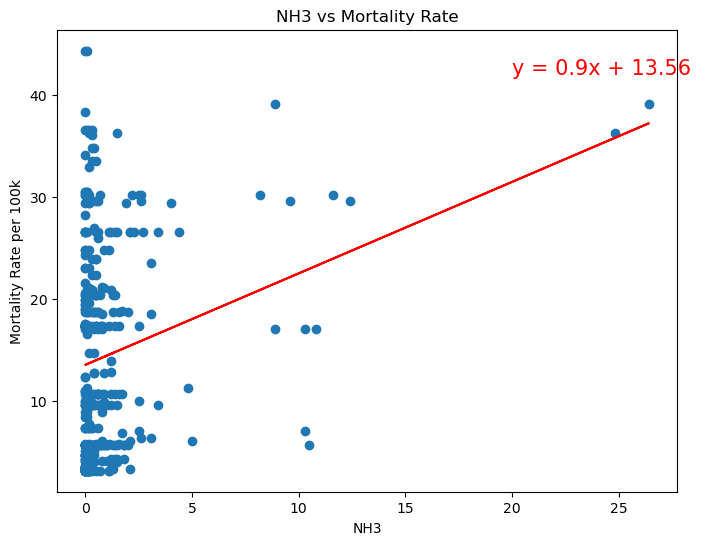

In [65]:
# Scatter plot between PM2.5 and Mortality Rate
x_axis_data_NH3 = data['NH3']
y_axis_data = data['MortalityRate_per_100k']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_data_NH3, y_axis_data)
regress_values = x_axis_data_NH3 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8, 6)) 
plt.scatter(x_axis_data_NH3, y_axis_data)
plt.title('NH3 vs Mortality Rate')
plt.xlabel('NH3')
plt.ylabel('Mortality Rate per 100k')
plt.plot(x_axis_data_NH3, regress_values,"r-")
plt.annotate(line_eq,(20,42),fontsize=15,color="red") 
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Picture_for_Presentation/NH3_vs_MortalityRate.png')
plt.show()